# 7.2
# Part 1

Ordinary Linear Regression Cross-Validated R^2: -7.243833902756543e+20
Ridge Regression Cross-Validated R^2: 0.8619316345217338


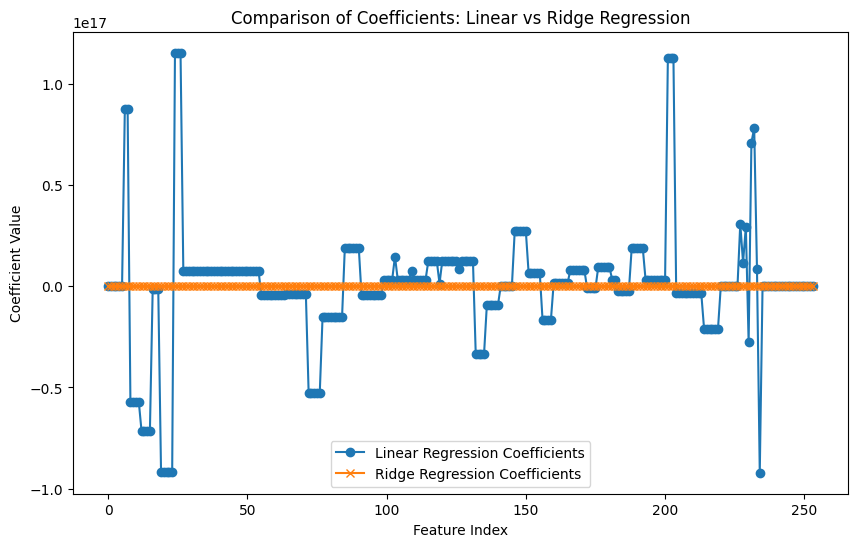

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

# Load the dataset
ames = pd.read_csv("/content/AmesHousing (1).csv")

# Remove columns with too many missing values and drop remaining NA values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:, good_cols].dropna()

# Split data into features and target
X = ames.drop(["SalePrice", "Order", "PID"], axis=1)
y = ames["SalePrice"]

# Define Column Transformer with OneHotEncoder for categorical and StandardScaler for numeric features
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

# Pipeline for Linear Regression
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("linear_regression", LinearRegression())
])

# Pipeline for Ridge Regression with alpha=1
ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge(alpha=1))
])

# Cross-validate both pipelines
lr_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2')
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')

print("Ordinary Linear Regression Cross-Validated R^2:", lr_scores.mean())
print("Ridge Regression Cross-Validated R^2:", ridge_scores.mean())

# Fit models on the full dataset to get coefficients
lr_pipeline.fit(X, y)
ridge_pipeline.fit(X, y)

# Extract coefficients from the Ridge and Linear models for comparison
lr_coeffs = lr_pipeline.named_steps['linear_regression'].coef_
ridge_coeffs = ridge_pipeline.named_steps['ridge_regression'].coef_

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.plot(lr_coeffs, label="Linear Regression Coefficients", marker='o')
plt.plot(ridge_coeffs, label="Ridge Regression Coefficients", marker='x')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients: Linear vs Ridge Regression")
plt.legend()
plt.show()


# Part 2

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a range of lambda (alpha) values to test, on a log scale
lambda_values = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Pipeline with Ridge Regression as before
ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge())
])

# Set up GridSearchCV to tune the alpha (lambda) hyperparameter
grid_search = GridSearchCV(ridge_pipeline, lambda_values, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X, y)

# Find the best lambda value and the corresponding R^2 score
best_lambda = grid_search.best_params_['ridge_regression__alpha']
best_score = grid_search.best_score_

print("Best Lambda (alpha) for Ridge Regression:", best_lambda)
print("Best Cross-Validated R^2 Score:", best_score)


Best Lambda (alpha) for Ridge Regression: 10
Best Cross-Validated R^2 Score: 0.8642722110166747


# Part 3

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso

# Define the range of lambda (alpha) values for tuning, on a log scale
alpha_values = {'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a pipeline for LASSO Regression
lasso_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lasso_regression", Lasso(max_iter=10000))  # Increase max_iter for convergence
])

# Set up GridSearchCV for tuning the alpha (lambda) parameter
grid_search_lasso = GridSearchCV(lasso_pipeline, alpha_values, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search_lasso.fit(X, y)

# Find the best lambda (alpha) and the corresponding R^2 score
best_alpha = grid_search_lasso.best_params_['lasso_regression__alpha']
best_score_lasso = grid_search_lasso.best_score_

print("Best Alpha (Lambda) for LASSO:", best_alpha)
print("Best Cross-Validated R^2 Score for LASSO:", best_score_lasso)

# Fit the best LASSO model on the full data to examine coefficients
best_lasso_model = grid_search_lasso.best_estimator_
best_lasso_model.fit(X, y)

# Get LASSO coefficients
lasso_coefficients = best_lasso_model.named_steps['lasso_regression'].coef_

# Compare LASSO coefficients to Ridge and OLS
# Fitting the Ridge and OLS models again for comparison
ridge_model = Ridge(alpha=best_lambda)  # Use best lambda from Ridge tuning
# Apply the column transformer to X before fitting the Ridge model
X_transformed = ct.fit_transform(X)  # Transform X using the column transformer
ridge_model.fit(X_transformed, y) #Fit the model with transformed data
ridge_coefficients = ridge_model.coef_

ols_model = LinearRegression()
ols_model.fit(X_transformed, y) #Fit the model with transformed data
ols_coefficients = ols_model.coef_

# Print comparison of coefficients
print("LASSO Coefficients:", lasso_coefficients)
print("Ridge Coefficients:", ridge_coefficients)
print("OLS Coefficients:", ols_coefficients)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e

Best Alpha (Lambda) for LASSO: 100
Best Cross-Validated R^2 Score for LASSO: 0.8669311075511448
LASSO Coefficients: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.40179046e+03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.91561103e+03 -0.00000000e+00  0.00000000e+00
 -1.02299521e+04  5.27128450e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.35462663e+03 -2.63928711e+03 -0.00000000e+00  1.77446540e+02
 -0.00000000e+00  2.11317738e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.14107952e+03  0.00000000e+00
 -0.00000000e+00  1.41381624e+04 -7.39480667e+03 -1.20939271e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -6.88307419e+02 -3.10766828e+03  0.00000000e+00
 -4.43798790e+03  3.63801042e+04  2.61893814e+04 -2.59146809e+03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.40936035e+04
  3.79963928e+04  0.00000000e+00 -0.000

In [ ]:
from sklearn.linear_model import ElasticNet

# Define the range of alpha (lambda) and l1_ratio (alpha) values for tuning
param_grid = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elastic_net__l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # 0 is pure Ridge, 1 is pure LASSO
}

# Create an Elastic Net pipeline
elastic_net_pipeline = Pipeline([
    ("preprocessing", ct),
    ("elastic_net", ElasticNet(max_iter=10000))  # Increase max_iter for convergence
])

# Set up GridSearchCV for tuning both alpha and l1_ratio
grid_search_elastic_net = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search_elastic_net.fit(X, y)

# Find the best parameters and corresponding R^2 score
best_alpha = grid_search_elastic_net.best_params_['elastic_net__alpha']
best_l1_ratio = grid_search_elastic_net.best_params_['elastic_net__l1_ratio']
best_score_elastic_net = grid_search_elastic_net.best_score_

print("Best Alpha (Lambda) for Elastic Net:", best_alpha)
print("Best L1 Ratio (Alpha) for Elastic Net:", best_l1_ratio)
print("Best Cross-Validated R^2 Score for Elastic Net:", best_score_elastic_net)

# Fit the best Elastic Net model on the full data to examine coefficients
best_elastic_net_model = grid_search_elastic_net.best_estimator_
best_elastic_net_model.fit(X, y)

# Get Elastic Net coefficients
elastic_net_coefficients = best_elastic_net_model.named_steps['elastic_net'].coef_

# Compare Elastic Net coefficients to Ridge, LASSO, and OLS
print("Elastic Net Coefficients:", elastic_net_coefficients)
print("Ridge Coefficients:", ridge_coefficients)
print("LASSO Coefficients:", lasso_coefficients)
print("OLS Coefficients:", ols_coefficients)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.517e+11, tolerance: 1.348e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.311e+11, tolerance: 1.474e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best Alpha (Lambda) for Elastic Net: 100
Best L1 Ratio (Alpha) for Elastic Net: 1
Best Cross-Validated R^2 Score for Elastic Net: 0.8669311075511448
Elastic Net Coefficients: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.40179046e+03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.91561103e+03 -0.00000000e+00  0.00000000e+00
 -1.02299521e+04  5.27128450e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.35462663e+03 -2.63928711e+03 -0.00000000e+00  1.77446540e+02
 -0.00000000e+00  2.11317738e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.14107952e+03  0.00000000e+00
 -0.00000000e+00  1.41381624e+04 -7.39480667e+03 -1.20939271e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -6.88307419e+02 -3.10766828e+03  0.00000000e+00
 -4.43798790e+03  3.63801042e+04  2.61893814e+04 -2.59146809e+03
 -0.00000000e+00  0.00000000e+00 -0.00000000e